In [71]:
import pandas as pd
import numpy as np

In [72]:
train_data = pd.read_csv("train.csv")
train_data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [73]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [74]:
train_data.describe

<bound method NDFrame.describe of              ID  Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      45654403  13328  1399          LEXUS   RX 450        2010       Jeep   
1      44731507  16621  1018      CHEVROLET  Equinox        2011       Jeep   
2      45774419   8467     -          HONDA      FIT        2006  Hatchback   
3      45769185   3607   862           FORD   Escape        2011       Jeep   
4      45809263  11726   446          HONDA      FIT        2014  Hatchback   
...         ...    ...   ...            ...      ...         ...        ...   
19232  45798355   8467     -  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  45778856  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  45804997  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235  45793526   5331  1288      CHEVROLET  Captiva        2007       Jeep   
19236  45813273    470   753        HYUNDAI   Sonata        2012      Sedan   

      Leather int

In [75]:
train_data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

DATA CLEANING

In [76]:
# Bersihkan kolom Levy: Ganti nilai '—' atau '-' menjadi NaN dan isi nilai yang kosong
train_data['Levy'] = train_data['Levy'].replace(['—', '-'], np.nan).astype(float)
train_data['Levy'].fillna(train_data['Levy'].median())

0        1399.0
1        1018.0
2         781.0
3         862.0
4         446.0
          ...  
19232     781.0
19233     831.0
19234     836.0
19235    1288.0
19236     753.0
Name: Levy, Length: 19237, dtype: float64

In [77]:
# Bersihkan kolom Mileage: Hapus teks tambahan seperti km dan ubah menjadi numerik
train_data['Mileage'] = train_data['Mileage'].str.replace(' km', '').str.replace(',', '').astype(float)
train_data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [78]:
# Bersihkan kolom Engine volume: Ekstrak nilai numerik
train_data['Engine volume'] = train_data['Engine volume'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
train_data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [79]:
# Tambahkan kolom Age: Hitung usia kendaraan berdasarkan tahun saat ini
current_year = 2024
train_data['Age'] = current_year - train_data['Prod. year']
train_data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,14
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,13
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2,18
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0,13
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4,10


In [80]:
# Mengonversi Kolom Kategorikal ke Bentuk Numerik (One-Hot Encoding)
categorical_columns = ['Manufacturer', 'Category', 'Fuel type', 'Gear box type', 
                       'Drive wheels', 'Wheel', 'Color']
train_data = pd.get_dummies(train_data, columns=categorical_columns, drop_first=True)
train_data.head()

,ID,Price,Levy,Model,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,45654403,13328,1399.0,RX 450,2010,Yes,3.5,186005.0,6.0,04-May,...,False,False,False,False,False,False,True,False,False,False
1,44731507,16621,1018.0,Equinox,2011,No,3.0,192000.0,6.0,04-May,...,False,False,False,False,False,False,False,False,False,False
2,45774419,8467,NaN,FIT,2006,No,1.3,200000.0,4.0,04-May,...,False,False,False,False,False,False,False,False,False,False
3,45769185,3607,862.0,Escape,2011,Yes,2.5,168966.0,4.0,04-May,...,False,False,False,False,False,False,False,False,True,False
4,45809263,11726,446.0,FIT,2014,Yes,1.3,91901.0,4.0,04-May,...,False,False,False,False,False,False,True,False,False,False


In [81]:
# Menghapus Kolom yang Tidak Diperlukan
excluded_columns = ['ID', 'Model', 'Leather interior', 'Doors', 'Price']
features = [col for col in train_data.columns if col not in excluded_columns]
train_data.head()

,ID,Price,Levy,Model,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,45654403,13328,1399.0,RX 450,2010,Yes,3.5,186005.0,6.0,04-May,...,False,False,False,False,False,False,True,False,False,False
1,44731507,16621,1018.0,Equinox,2011,No,3.0,192000.0,6.0,04-May,...,False,False,False,False,False,False,False,False,False,False
2,45774419,8467,NaN,FIT,2006,No,1.3,200000.0,4.0,04-May,...,False,False,False,False,False,False,False,False,False,False
3,45769185,3607,862.0,Escape,2011,Yes,2.5,168966.0,4.0,04-May,...,False,False,False,False,False,False,False,False,True,False
4,45809263,11726,446.0,FIT,2014,Yes,1.3,91901.0,4.0,04-May,...,False,False,False,False,False,False,True,False,False,False


In [83]:
# Pembagian Data untuk Pelatihan dan Pengujian Model (Train-Test Split)
from sklearn.model_selection import train_test_split

X = train_data[features]
y = train_data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


DATA MODELLING

In [84]:
train_data.describe()

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Age
count,1.923700e+04,1.923700e+04,13418.000000,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,906.838128,2010.912824,2.307990,1.532236e+06,4.582991,6.582627,13.087176
std,9.365914e+05,1.905813e+05,461.867051,5.668673,0.877805,4.840387e+07,1.199933,4.320168,5.668673
min,2.074688e+07,1.000000e+00,87.000000,1939.000000,0.000000,0.000000e+00,1.000000,0.000000,4.000000
25%,4.569837e+07,5.331000e+03,640.000000,2009.000000,1.800000,7.013900e+04,4.000000,4.000000,9.000000
50%,4.577231e+07,1.317200e+04,781.000000,2012.000000,2.000000,1.260000e+05,4.000000,6.000000,12.000000
75%,4.580204e+07,2.207500e+04,1058.000000,2015.000000,2.500000,1.888880e+05,4.000000,12.000000,15.000000
max,4.581665e+07,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,16.000000,85.000000


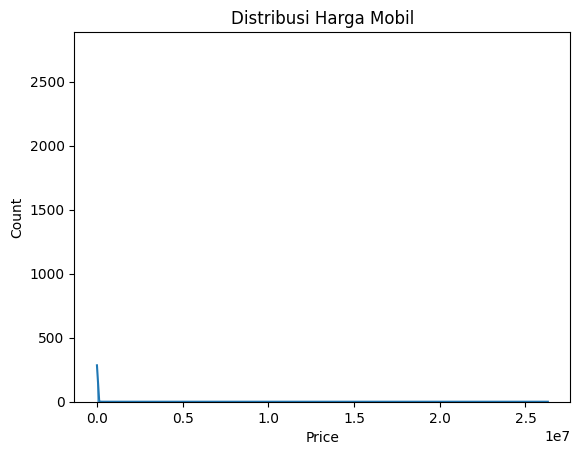

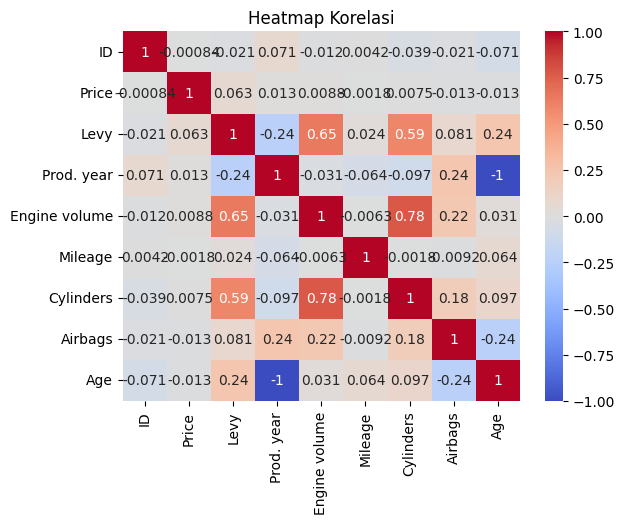

In [86]:
# Menggunakan grafik untuk lebih memahami distribusi dan hubungan antar kolom.
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi harga mobil
sns.histplot(train_data['Price'], kde=True)
plt.title('Distribusi Harga Mobil')
plt.show()

# Visualisasi korelasi antar fitur
# Pilih hanya kolom numerik
numerical_data = train_data.select_dtypes(include=['float64', 'int64'])

# Hitung korelasi untuk kolom numerik saja
correlation = numerical_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()


In [87]:
# Pemilihan Fitur (Feature Selection) pada tahap ini, kita akan memutuskan fitur mana yang akan digunakan dalam model.
from sklearn.ensemble import RandomForestRegressor

# Membuat model random forest untuk seleksi fitur
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Menampilkan fitur yang paling penting
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)


                   Feature    Importance
6                      Age  1.735488e-01
1               Prod. year  1.572802e-01
3                  Mileage  1.477616e-01
94              Color_Blue  8.819824e-02
5                  Airbags  7.305464e-02
..                     ...           ...
56     Manufacturer_SATURN  1.249553e-08
25  Manufacturer_GREATWALL  1.004011e-08
70       Manufacturer_სხვა  9.090601e-10
83      Fuel type_Hydrogen  6.243498e-10
36     Manufacturer_LANCIA  0.000000e+00

[108 rows x 2 columns]


In [89]:
# Standardisasi: Mengubah fitur sehingga distribusinya memiliki rata-rata 0 dan deviasi standar 1.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Normalisasi: Mengubah fitur agar berada dalam rentang [0, 1].
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [92]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Inisialisasi imputer untuk mengganti NaN dengan nilai median
imputer = SimpleImputer(strategy='median')

# Membuat pipeline yang terdiri dari imputer dan model regresi
model = make_pipeline(imputer, LinearRegression())

# Melatih model dengan data
model.fit(X_train, y_train)

# Melakukan prediksi
y_pred = model.predict(X_test)

In [93]:
# Evaluasi model
from sklearn.metrics import mean_squared_error

# Menghitung RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')


RMSE: 23272.070538036634


In [94]:
from sklearn.model_selection import GridSearchCV

# Parameter yang akan dicoba
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]}

# Grid Search untuk RandomForest
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'max_depth': 20, 'n_estimators': 100}


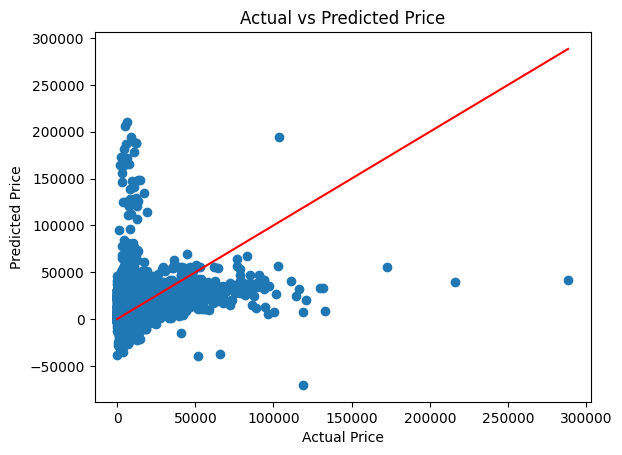

In [97]:
# memvisualisasikan hasil prediksi dengan grafik untuk melihat seberapa baik model melakukan estimasi harga
import matplotlib.pyplot as plt

# Plot perbandingan harga aktual dan prediksi
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Garis ideal
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()


In [96]:
import joblib

# Menyimpan model ke file
joblib.dump(model, 'model_estimasi_harga_mobil.pkl')

['model_estimasi_harga_mobil.pkl']